In [ ]:
# Import the necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import scipy
import os

# Remove Deprecation and Future Warnings
import warnings
from Bio import BiopythonDeprecationWarning
warnings.simplefilter('ignore', BiopythonDeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Load the fasta files and annotations
TumE_fastas = SeqIO.to_dict(SeqIO.parse('TumE.fasta', "fasta"))
TumE_annotations = pd.read_csv('TumE_annotations.csv')

# Function to retrieve the sequence from the fasta
def fasta_seq(fasta_id):
  return str(TumE_fastas.get(fasta_id).seq)

# Add the sequence to the dataframe according the uniprotAC
TumE_annotations['sequence'] = TumE_annotations['uniprotAC'].apply(fasta_seq)

##### Hydrophobicity & Charge Profiles

In [ ]:
def compute_properties(fasta_file):
    data = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        seq = str(record.seq)
        analysis = ProteinAnalysis(seq)
        data.append({
            "Sequence_ID": record.id,
            "hydrophobicity": analysis.gravy(),
            "aromaticity": analysis.aromaticity(),
            "instability_index": analysis.instability_index(),
            "isoelectric_point": analysis.isoelectric_point(),
            "charge": analysis.charge_at_pH(7.0)
        })
    return pd.DataFrame(data)

# Example
df = compute_properties("TumE.fasta")

def classify_stability(index):
    return "Stable" if index < 40 else "Unstable"

def stability(fasta_id):
    row = df[df['Sequence_ID'] == fasta_id]
    return row['instability_index'].values[0]

TumE_annotations['stability'] = TumE_annotations['uniprotAC'].apply(stability).apply(classify_stability)

def classify_hydrophobicity(h):
    return "Hydrophilic" if h < -0.5 else "Hydrophobic" if h > 0.5 else "Moderate"

def hydrophobicity(fasta_id):
    row = df[df['Sequence_ID'] == fasta_id]
    return row['hydrophobicity'].values[0]

TumE_annotations['hydrophobicity'] = TumE_annotations['uniprotAC'].apply(hydrophobicity).apply(classify_hydrophobicity)

def classify_aromaticity(a):
    return "Low" if a < 0.05 else "High" if a > 0.10 else "Medium"

def aromaticity(fasta_id):
    row = df[df['Sequence_ID'] == fasta_id]
    return row['aromaticity'].values[0]

TumE_annotations['aromaticity'] = TumE_annotations['uniprotAC'].apply(aromaticity).apply(classify_aromaticity)

def classify_pI(pI):
    return "Acidic" if pI < 6 else "Basic" if pI > 8 else "Neutral"

def pH(fasta_id):
    row = df[df['Sequence_ID'] == fasta_id]
    return row['isoelectric_point'].values[0]

TumE_annotations['pH'] = TumE_annotations['uniprotAC'].apply(pH).apply(classify_pI)

def classify_charge(c):
    return "Negative" if c < -1 else "Positive" if c > 1 else "Neutral"

def charge(fasta_id):
    row = df[df['Sequence_ID'] == fasta_id]
    return row['charge'].values[0]

TumE_annotations['charge'] = TumE_annotations['uniprotAC'].apply(charge).apply(classify_charge)
TumE_annotations

,uniprotAC,superkingdom,phylum,class,order,family,genus,species,deepfri prediction1,deepfri prediction2,sequence,stability,hydrophobicity,aromaticity,pH,charge
0,A0A3N6P9C6,Archaea,Euryarchaeota,Halobacteria,Natrialbales,Natrialbaceae,Natrarchaeobius,Natrarchaeobius halalkaliphilus,signaling receptor binding,carbohydrate binding,MVPVNDGRSPAPIDRSVLERLRSQFLGSRMFQSAEIVTAGKLHLRV...,Unstable,Hydrophilic,Medium,Acidic,Negative
1,A0A3A6QB52,Archaea,Euryarchaeota,Halobacteria,Haloferacales,Halorubraceae,Halonotius,Halonotius pteroides,thiolester hydrolase activity,lyase activity,MDGSAAPIDDSILELLAERARTHPLAQTVRTQYTGGILSLVVVELD...,Unstable,Hydrophilic,Medium,Acidic,Negative
2,M0K299,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloarculaceae,Haloarcula,Haloarcula amylolytica,lyase activity,NaN,MPDNQDGPSGTGPTDAEILDRIAPHLSRSARFGDVQARPEYAPNAV...,Unstable,Hydrophilic,High,Acidic,Negative
3,A0A1Q1FLI6,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloarculaceae,Halorientalis,Halorientalis sp. IM1011,transition metal ion binding,lyase activity,MTRGGETRPDGDGRGAPIDFDRLETIAERLATDDRFVQIEREPEFA...,Unstable,Hydrophilic,High,Acidic,Negative
4,A0A1Q1FKG1,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloarculaceae,Halorientalis,Halorientalis sp. IM1011,carbohydrate derivative binding,transition metal ion binding,MVPVDTGASPAPIDRPVLERMQSRFVGSRMVESAAIIEEGKLHLRV...,Unstable,Hydrophilic,Medium,Acidic,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,A0A524AUA9,Bacteria,Chloroflexota,Anaerolineae,Anaerolineales,NaN,NaN,Anaerolineales bacterium,DNA binding,NaN,MLSSLVSYSRLVYTIPDQFPSVRRSTLVLKPMGVAVGELEGRMDFE...,Unstable,Moderate,Medium,Acidic,Negative
856,A0A1W9UX82,Bacteria,Chloroflexota,Anaerolineae,Anaerolineales,Anaerolineaceae,NaN,Anaerolineaceae bacterium 4572_5.1,DNA binding,transcription regulator activity,MPPLDRDALFSIEKYCQTIYTFLDNAPSIRGHTVRIYSRGAWVGVL...,Unstable,Hydrophilic,High,Neutral,Neutral
857,A0A524AHJ7,Bacteria,Chloroflexota,Anaerolineae,Anaerolineales,NaN,NaN,Anaerolineales bacterium,methyltransferase activity,transferring one-carbon groups,MLTRTQYERLIYTLPSRHLSIRLSTLVLAPPGLDVARLTGLMAFGD...,Unstable,Moderate,High,Neutral,Positive
858,A0A3M1PAG6,Bacteria,Calditrichota,NaN,NaN,NaN,NaN,Calditrichota bacterium,acting on NAD(P)H,NaN,MTNPLKTPEDYELFLYTITEQFSQIQRSSLVFIRLGASLARVKGEL...,Unstable,Moderate,High,Neutral,Neutral


##### MDS on meme clusters

In [ ]:
def motif_pos(x):
  
    seq = list(x['sequence'])[0]
    motif = list(list(x['meme_clusters'])[0])
    tmp = pd.DataFrame(1, index=[1], columns=[motif[i]+'_'+str(i+1) for i in range(len(motif))])
    tmp['seq'] = seq
    return [tmp]

tmp = TumE_annotations[~TumE_annotations['meme_clusters'].isna()].groupby('sequence').apply(lambda x: motif_pos(x))
meme_tmp = pd.concat(sum(tmp, [])).fillna(0)

/tmp/ipykernel_397/3553888143.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tmp = TumE_annotations[~TumE_annotations['meme_clusters'].isna()].groupby('sequence').apply(lambda x: motif_pos(x))


<Axes: xlabel='0', ylabel='1'>

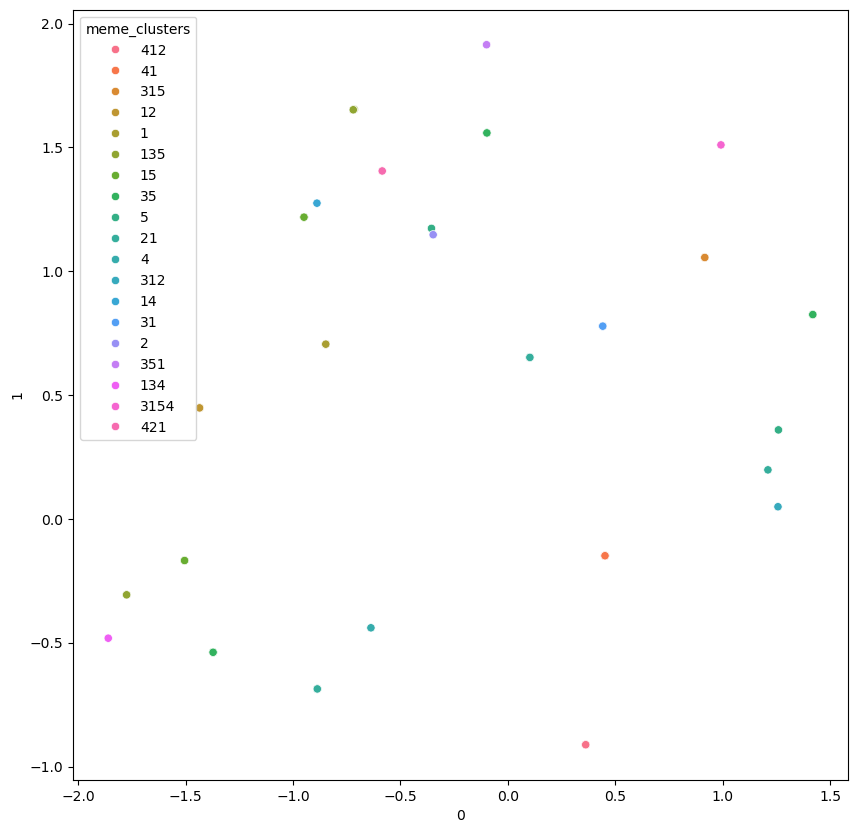

In [ ]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2, random_state=42)
X_transformed = embedding.fit_transform(meme_tmp.drop('seq', axis=1))

data = pd.DataFrame(X_transformed)
data['seq'] = list(meme_tmp['seq'])
data = data.merge(TumE_annotations, left_on='seq', right_on='sequence')

plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x=0, y=1, hue='meme_clusters')

##### MDS on kmers

In [ ]:
# Threshold of the Levenshtein ratio to add edges to the graph
threshold = 0.5
# Cluster annotations for the graph
clu_annotations = 'levenshtein'
# Minimum size for the clusters to show on the graph
size_clu = 0

##### Plot the PCA of AA log density with hue superkingdom and archaea

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=data, x=0, y=1, hue='superkingdom')

plt.figure(figsize=(5, 5))
sns.scatterplot(data=data[data['superkingdom'] == 'Archaea'], x=0, y=1, hue='class')

ValueError: Could not interpret value `superkingdom` for `hue`. An entry with this name does not appear in `data`.

<Figure size 500x500 with 0 Axes>

##### Plot the PCA of AA log density with hue meme clusters

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=data[data['superkingdom'] == 'Bacteria'], x=0, y=1, hue='meme_clusters')

plt.figure(figsize=(5, 5))
sns.scatterplot(data=data[data['superkingdom'] == 'Archaea'], x=0, y=1, hue='meme_clusters')

KeyError: 'superkingdom'

<Figure size 500x500 with 0 Axes>

In [ ]:
# Keep only the sequence combinations with levenshstein ration > i
filtered_leven = leven_df[leven_df['ratio'] >= threshold].drop('ratio', axis=1)
G = nx.Graph()
# Add edges for those combinations
G.add_edges_from(filtered_leven.values)
# Get the connected sequences as clusters
connected_seqs = list(nx.connected_components(G))
seq_cluster = [(seq, f"cluster_{i}") for i, cluster in enumerate(connected_seqs) for seq in cluster]
data = pd.DataFrame(seq_cluster, columns=['seq', 'levenshtein'])
TumE_annotations = TumE_annotations.merge(data, left_on='sequence', right_on='seq')

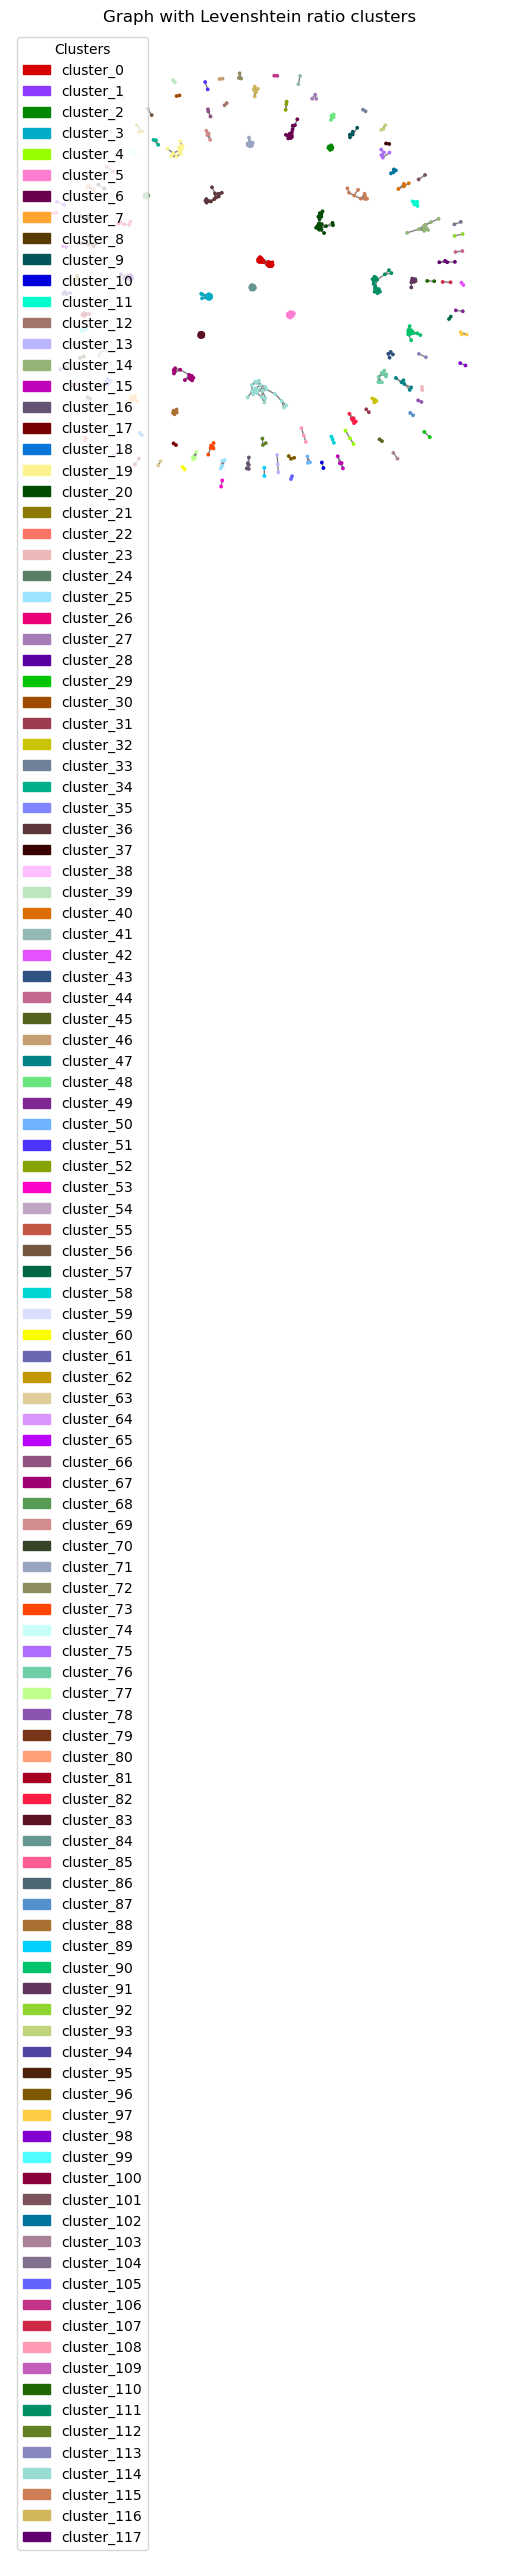

In [ ]:
from matplotlib.patches import Patch
import colorcet as cc

# Filter clusters with ≥10 occurrences
valid_clusters = TumE_annotations[clu_annotations].value_counts()
valid_clusters = valid_clusters[valid_clusters >= size_clu].index
df_clusters_filtered = TumE_annotations[TumE_annotations[clu_annotations].isin(valid_clusters)]

# Filter edges to those between valid cluster nodes
valid_nodes = set(df_clusters_filtered['sequence'])
filtered_edges = filtered_leven[filtered_leven['seq1'].isin(valid_nodes) & filtered_leven['seq2'].isin(valid_nodes)]

# Build graph
filtered_G = nx.Graph()
filtered_G.add_edges_from(filtered_edges.values)

# Cluster coloring with glasbey
unique_labels = df_clusters_filtered[clu_annotations].unique()
label_to_int = {label: i for i, label in enumerate(unique_labels)}
cluster_dict = df_clusters_filtered.set_index('sequence')[clu_annotations].to_dict()
colors = cc.glasbey[:len(unique_labels)]
node_color_values = [colors[label_to_int[cluster_dict[node]]] for node in filtered_G.nodes()]

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(filtered_G, seed=42)
nx.draw(
    filtered_G, pos,
    node_color=node_color_values,
    edge_color='gray',
    node_size=3
)

# Legend
legend_handles = [Patch(color=colors[i], label=label) for label, i in label_to_int.items()]
plt.legend(handles=legend_handles, title="Clusters", loc='best')

plt.title("Graph with Levenshtein ratio clusters")
plt.show()

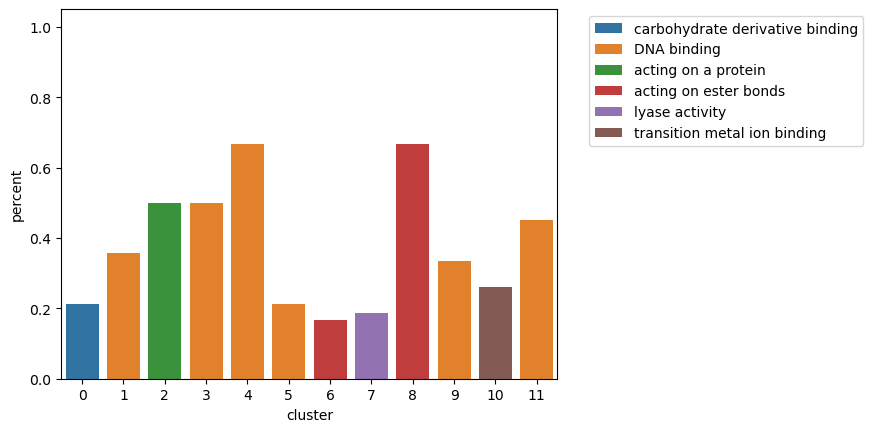

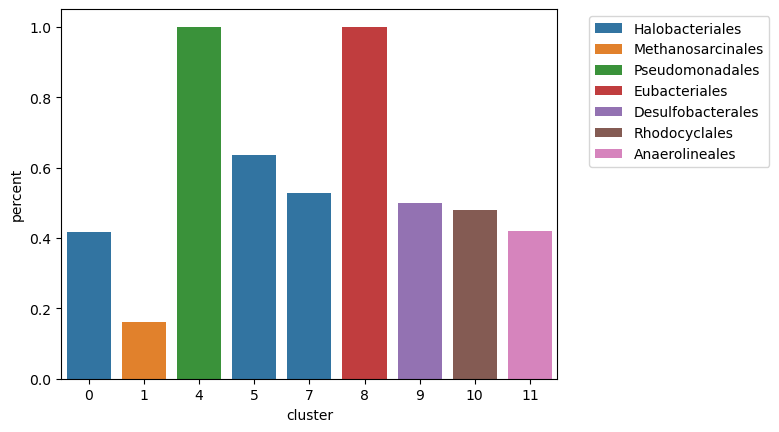

In [ ]:
for feature in ['deepfri prediction1', 'order']:
    leven_tmp = leven_annot.groupby(['cluster', feature]).size().reset_index()
    leven_tmp = leven_tmp.sort_values(0, ascending=False).groupby(['cluster']).apply(lambda x: pd.DataFrame({'max': [list(x[feature])[0]], 'percent': [list(x[0])[0]/sum(x[0])]}))
    plt.figure()
    sns.barplot(data=leven_tmp, x='cluster', y='percent', hue='max')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.ylim(0, 1.05)
    plt.show()

In [ ]:
leven_annot.sort_values(0, ascending=False).groupby(['cluster']).apply(lambda x: pd.DataFrame({'max': [list(x['superkingdom'])[0]], 'percent': [list(x[0])[0]/sum(x[0])]}))

,,max,percent
cluster,,,
0,0,Archaea,1.000000
1,0,Bacteria,0.791946
2,0,Bacteria,1.000000
3,0,Archaea,1.000000
4,0,Bacteria,1.000000
5,0,Archaea,1.000000
6,0,Archaea,1.000000
7,0,Archaea,1.000000
8,0,Bacteria,1.000000


<Axes: xlabel='cluster', ylabel='0'>

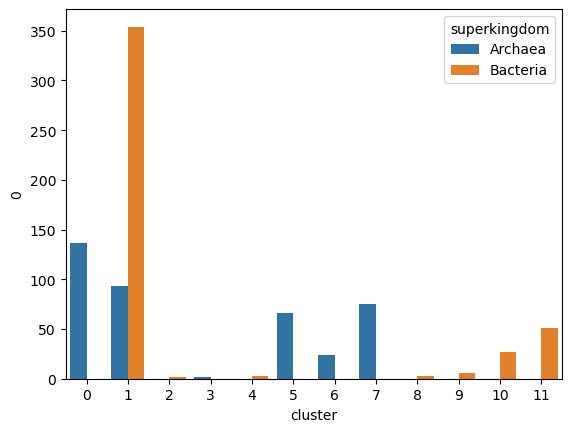

In [ ]:
sns.barplot(data=leven_annot, x='cluster', y=0, hue='superkingdom')

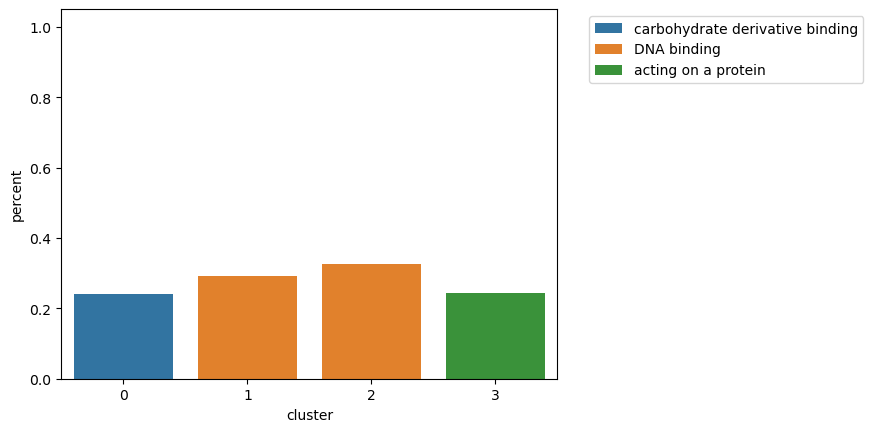

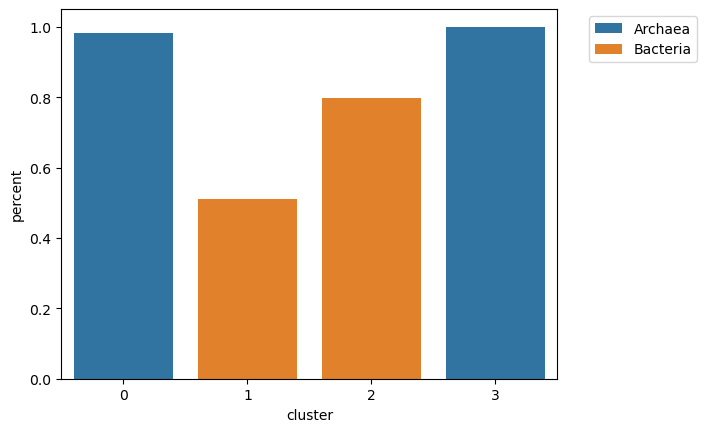

In [ ]:
for feature in ['deepfri prediction1', 'superkingdom']:
    leven_tmp = data_aa.groupby(['cluster', feature]).size().reset_index()
    leven_tmp = leven_tmp.sort_values(0, ascending=False).groupby(['cluster']).apply(lambda x: pd.DataFrame({'max': [list(x[feature])[0]], 'percent': [list(x[0])[0]/sum(x[0])]}))
    plt.figure()
    sns.barplot(data=leven_tmp, x='cluster', y='percent', hue='max')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.ylim(0, 1.05)
    plt.show()

In [ ]:
from tqdm import tqdm 

kmers_tmp = pd.DataFrame()
allseq = list(TumE_annotations['sequence'])
nk = 3
for i in tqdm(range(len(allseq))):
    seq = allseq[i]
    if len(seq)>nk:
        tmp_cols = [seq[i:i+nk] for i in range(0, len(seq), nk)]
        kmers, counts = np.unique(tmp_cols, return_counts=True)
        tmp = pd.DataFrame(1, index=[1], columns=[list(set(kmers))])
    else:
        tmp = pd.DataFrame(1, index=[1], columns=[seq])
    tmp['seq'] = seq
    kmers_tmp = pd.concat([kmers_tmp, tmp]).fillna(0)

100%|██████████| 860/860 [03:42<00:00,  3.87it/s]


In [ ]:
kmers_euc = 1 / scipy.spatial.distance.pdist(kmers_tmp.drop('seq', axis=1), 'jaccard') - 1

/tmp/ipykernel_18862/2439682723.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  kmers_euc = 1 / scipy.spatial.distance.pdist(kmers_tmp.drop('seq', axis=1), 'jaccard') - 1


In [ ]:
kmers_sq = pd.DataFrame(scipy.spatial.distance.squareform(kmers_euc))
kmers_sq

,0,1,2,3,4,5,6,7,8,9,...,850,851,852,853,854,855,856,857,858,859
0,0.000000,0.010526,0.010526,0.021277,0.327586,0.010638,0.021739,0.000000,0.041096,0.021505,...,0.010753,0.010526,0.014925,0.010870,0.000000,0.032258,0.000000,0.020619,0.000000,0.010101
1,0.010526,0.000000,0.000000,0.000000,0.000000,0.010526,0.010526,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.021978,0.010753,0.000000,0.010417,0.000000,0.010526,0.010000
2,0.010526,0.000000,0.000000,0.068966,0.000000,0.381818,0.021505,0.094118,0.000000,0.032609,...,0.021739,0.000000,0.000000,0.021978,0.000000,0.010204,0.021277,0.000000,0.000000,0.010000
3,0.021277,0.000000,0.068966,0.000000,0.010417,0.032609,0.021277,0.031250,0.000000,0.000000,...,0.010526,0.021053,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000,0.010417,0.000000
4,0.327586,0.000000,0.000000,0.010417,0.000000,0.010638,0.033333,0.000000,0.056338,0.032967,...,0.000000,0.010526,0.014925,0.010870,0.000000,0.021053,0.000000,0.020619,0.000000,0.010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,0.032258,0.000000,0.010204,0.010101,0.021053,0.010309,0.021053,0.000000,0.000000,0.000000,...,0.128205,0.010204,0.000000,0.000000,0.021505,0.000000,0.000000,0.104651,0.021053,0.009804
856,0.000000,0.010417,0.021277,0.000000,0.000000,0.010526,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.056818,0.046875,0.033708,0.033708,0.000000,0.000000,0.020408,0.010526,0.000000
857,0.020619,0.000000,0.000000,0.000000,0.020619,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.068182,0.031250,0.000000,0.000000,0.000000,0.104651,0.020408,0.000000,0.010101,0.000000
858,0.000000,0.010526,0.000000,0.010417,0.000000,0.010638,0.000000,0.000000,0.000000,0.000000,...,0.010753,0.010526,0.000000,0.000000,0.022222,0.021053,0.010526,0.010101,0.000000,0.031579


/home/damien/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

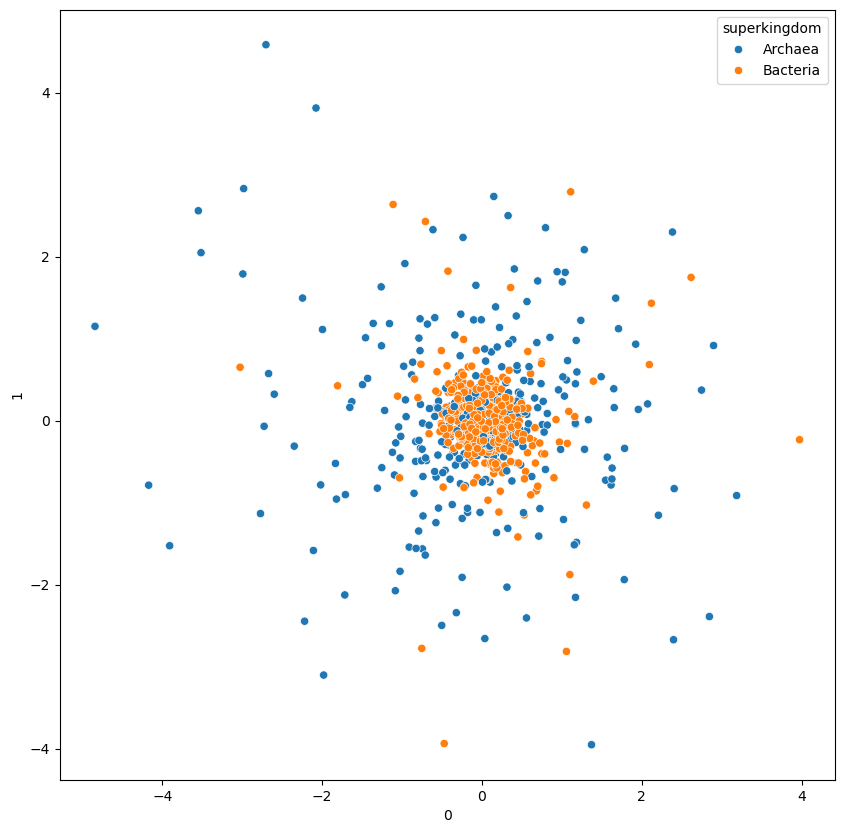

In [ ]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2, random_state=42)
X_transformed = embedding.fit_transform(kmers_sq)

data = pd.DataFrame(X_transformed)
data['seq'] = list(kmers_tmp['seq'].values[:, 0])
data = data.merge(TumE_annotations, left_on='seq', right_on='sequence')

plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x=0, y=1, hue='superkingdom')

##### Plot the PCA of AA log density with hue superkingdom and archaea

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=data, x=0, y=1, hue='superkingdom')

plt.figure(figsize=(5, 5))
sns.scatterplot(data=data[data['superkingdom'] == 'Archaea'], x=0, y=1, hue='class')

ValueError: Could not interpret value `superkingdom` for `hue`. An entry with this name does not appear in `data`.

<Figure size 500x500 with 0 Axes>

##### Plot the PCA of AA log density with hue meme clusters

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=data[data['superkingdom'] == 'Bacteria'], x=0, y=1, hue='meme_clusters')

plt.figure(figsize=(5, 5))
sns.scatterplot(data=data[data['superkingdom'] == 'Archaea'], x=0, y=1, hue='meme_clusters')

KeyError: 'superkingdom'

<Figure size 500x500 with 0 Axes>